prédit=78.813949, attendu=60.930000
prédit=51.201234, attendu=28.540000
prédit=31.435826, attendu=15.980000
prédit=27.333813, attendu=27.680000
prédit=38.229050, attendu=29.520000
prédit=36.883900, attendu=19.560000
prédit=28.261559, attendu=39.180000
prédit=45.063236, attendu=40.120000
prédit=41.848609, attendu=77.330000
prédit=70.843357, attendu=27.730000
prédit=25.458860, attendu=25.120000
prédit=32.587321, attendu=42.080000
prédit=45.937878, attendu=70.520000
prédit=64.913392, attendu=108.900000
prédit=90.181540, attendu=196.530000
prédit=154.231148, attendu=206.600000
prédit=149.330900, attendu=168.570000
prédit=120.550406, attendu=55.460000
prédit=37.972278, attendu=47.560000
prédit=55.124339, attendu=104.190000
prédit=102.306458, attendu=87.470000
prédit=77.617897, attendu=68.070000
prédit=65.846742, attendu=32.940000
prédit=41.360488, attendu=18.950000
prédit=36.395504, attendu=32.460000
prédit=49.036309, attendu=83.280000
prédit=86.571336, attendu=56.810000
prédit=54.893120, a

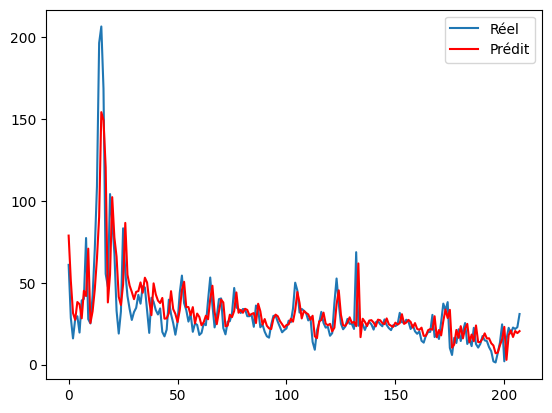

In [13]:
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np

# Définition d'une fonction d'analyseur pour convertir les chaînes de date en objets datetime
def analyseur(x):
    return pd.to_datetime(x)

# Chargement du jeu de données à partir d'un fichier CSV
#series = pd.read_csv('data.csv', header=0, index_col=0, parse_dates=True, date_parser=analyseur)
#series = pd.read_csv('data.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
series = pd.read_csv('data.csv', header=0, index_col=0, parse_dates=True)


# Suppression des lignes avec des valeurs manquantes (NaN)
series = series.dropna()


# Conversion de l'index en un Index de périodes avec une fréquence quotidienne
series.index = series.index.to_period('D')

#series = series.loc[series['Bel Air'] <= 150]
# Extraction des valeurs de la colonne 'Bel Air' en tant que données de séries temporelles
X = series['Bel Air'].values

# Calcul de la taille pour l'ensemble d'entraînement (66 % des données)
size = int(len(X) * 0.80)

# Séparation des données en ensembles d'entraînement et de test
train, test = X[0:size], X[size:len(X)]

# Initialisation d'une liste pour stocker les valeurs historiques pour faire des prédictions
history = [x for x in train]

# Initialisation d'une liste pour stocker les valeurs prédites
predictions = list()

# Initialisation d'une liste pour stocker les valeurs observées (test)
observed = list()

# Boucle de validation pas à pas
for t in range(len(test)):
    # Création d'un modèle ARIMA avec un ordre de (2, 1, 1)
    model = ARIMA(history, order=( 2, 1, 1))
    # Ajustement du modèle aux données historiques
    model_fit = model.fit()

    # Prévision de la prochaine valeur
    output = model_fit.forecast()
    yhat = output[0]

    # Stockage de la valeur prédite
    predictions.append(yhat)

    # Obtention de la valeur réelle à partir de l'ensemble de test
    obs = test[t]

    # Stockage de la valeur observée
    observed.append(obs)

    # Ajout de la valeur réelle aux données historiques pour la prochaine itération
    history.append(obs)

    # Affichage des valeurs prédites et attendues pour cette itération
    print('prédit=%f, attendu=%f' % (yhat, obs))

# Calcul de l'erreur quadratique moyenne (RMSE) pour évaluer les prévisions
rmse = sqrt(mean_squared_error(observed, predictions))
print('RMSE de test : %.3f' % rmse)

# Calcul du coefficient de corrélation entre les valeurs observées et prédites
correlation = np.corrcoef(observed, predictions)[0, 1]
print('Coefficient de corrélation : %.3f' % correlation)

# Enregistrement des prédictions et des valeurs observées dans un DataFrame
results_df = pd.DataFrame({'Observé': observed, 'Prédit': predictions})

# Sauvegarde du DataFrame dans un fichier CSV
results_df.to_csv('predictions_et_obs.csv', index=False)

# Affichage d'un message de confirmation
print("Prédictions et valeurs observées enregistrées dans 'predictions_et_obs.csv'")

# Tracé des valeurs réelles de l'ensemble de test et des valeurs prédites
pyplot.plot(observed, label='Réel')
pyplot.plot(predictions, color='red', label='Prédit')
pyplot.legend()
pyplot.show()
